In [1]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [2]:
input_file = 'data/nouns.txt'

In [3]:
nouns = []
with open(input_file, 'r') as f:
    for line in f:
        nouns.append(line[:-1])
print(len(nouns))

5233


In [4]:
tokens = [nlp(noun) for noun in nouns]
filtered_tokens = [token[0] for token in tokens if len(token) == 1]

In [5]:
print(len(filtered_tokens))

5230


In [6]:
inv_nouns = [noun for noun in filtered_tokens if not noun.is_oov]
len(inv_nouns)

5206

In [7]:
vectors = [noun.vector for noun in inv_nouns]

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [10]:
%time pca.fit(vectors)

CPU times: user 163 ms, sys: 21.9 ms, total: 184 ms
Wall time: 75.1 ms


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
%time vectors_2D = pca.transform(vectors)

CPU times: user 13 ms, sys: 2.62 ms, total: 15.6 ms
Wall time: 9.98 ms


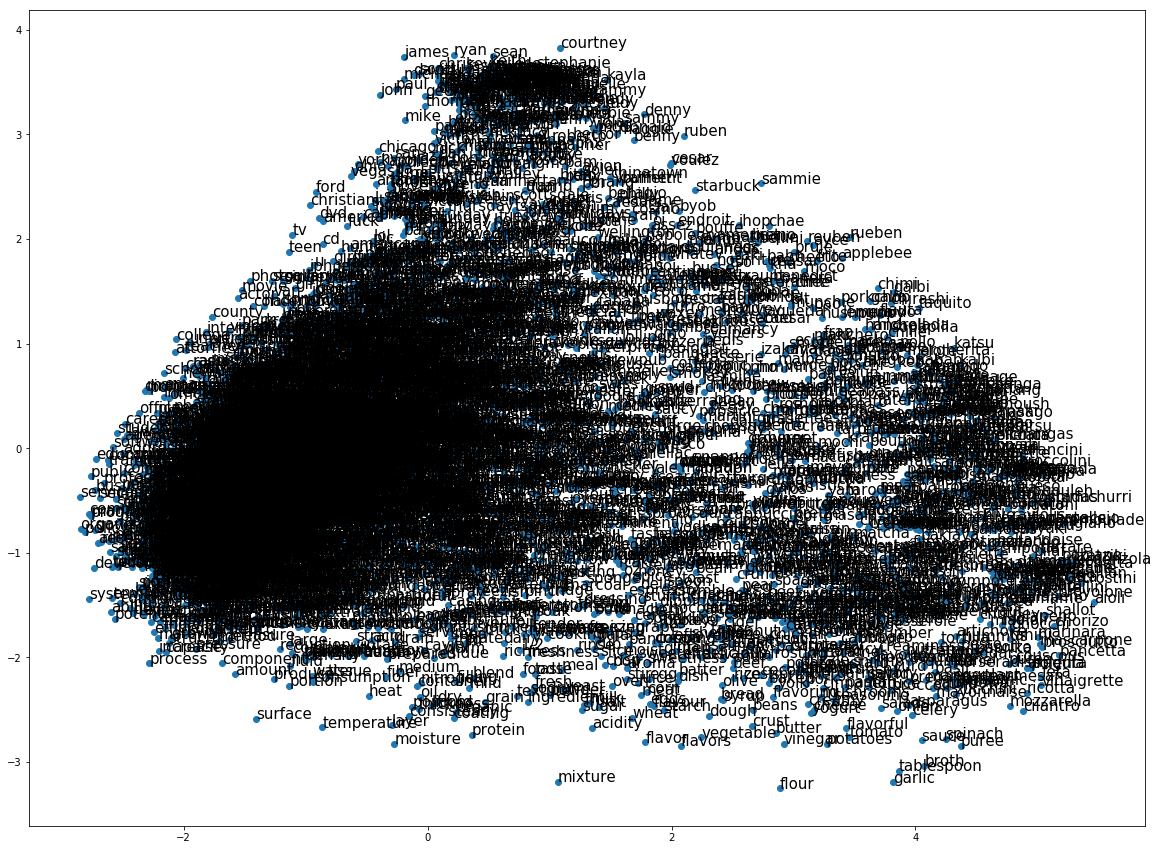

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.scatter(vectors_2D[:,0], vectors_2D[:,1])

for word, coord in zip(inv_nouns, vectors_2D):
    x, y = coord
    plt.text(x, y, word.text, size= 15)

plt.show()